# Masterclass: Mineração de Dados para Modelagem Preditiva

Introdução aos fundamentos da mineração de dados para modelagem preditiva. Exemplo práticos das técnicas utilizada no processo, para resolução de um problema.




**Prof Tiago Dias**

<img src="https://upload.wikimedia.org/wikipedia/commons/c/ca/LinkedIn_logo_initials.png" width="20" height="20" /> [LinkedIn](https://www.linkedin.com/in/diasctiago) |
<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/a/ae/Github-desktop-logo-symbol.svg/2048px-Github-desktop-logo-symbol.svg.png" width="23" height="23" /> [Github](https://github.com/diasctiago) |
<img src="https://dadosaocubo.com/wp-content/uploads/2021/03/NovaLogo.png" width="23" height="23" /> [Dados ao Cubo](https://dadosaocubo.com)

In [ ]:
# importa bibliotecas
from google.colab import files
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

import lightgbm as lgb


/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


In [ ]:
# carrega o token do Kaggle
files.upload()
print('Token Kaggle Carregado')

Saving kaggle.json to kaggle.json
Token Kaggle Carregado


In [ ]:
# kaggle API verifica o token em ~/.kaggle
!mkdir -p ~/.kaggle
# copia o token para ~/.kaggle
!cp kaggle.json ~/.kaggle/
# alterar a permissão para a Kaggle API
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
#!kaggle datasets list

## 1. Coleta e Preparação de Dados

In [ ]:
# download do dataset
!kaggle datasets download -d renatosn/sao-paulo-housing-prices

Dataset URL: https://www.kaggle.com/datasets/renatosn/sao-paulo-housing-prices
License(s): CC0-1.0
  0% 0.00/211k [00:00<?, ?B/s]
100% 211k/211k [00:00<00:00, 68.1MB/s]


In [ ]:
# extrai o dataset do zip
!unzip \*.zip  && rm *.zip

Archive:  sao-paulo-housing-prices.zip
  inflating: data.csv                


In [ ]:
# importa o dataset
df = pd.read_csv('data.csv')

In [ ]:
# exibi as primeiras linhas dos dados
df.head()

,address,district,area,bedrooms,garage,type,rent,total
0,Rua Herval,Belenzinho,21,1,0,Studio e kitnet,2400,2939
1,Avenida São Miguel,Vila Marieta,15,1,1,Studio e kitnet,1030,1345
2,Rua Oscar Freire,Pinheiros,18,1,0,Apartamento,4000,4661
3,Rua Júlio Sayago,Vila Ré,56,2,2,Casa em condomínio,1750,1954
4,Rua Barata Ribeiro,Bela Vista,19,1,0,Studio e kitnet,4000,4654


In [ ]:
# verifica dados nulos
df.isna().sum()

,0
address,0
district,0
area,0
bedrooms,0
garage,0
type,0
rent,0
total,0


## 2. Análise Exploratória de Dados (EDA)

In [ ]:
# métricas estatisticas básicas das variáveis numéricas
df.describe()

,area,bedrooms,garage,rent,total
count,11657.000000,11657.000000,11657.000000,11657.000000,11657.000000
mean,84.655658,1.966286,1.060393,3250.814789,4080.030625
std,74.020536,0.931313,1.132349,2650.711557,3352.480274
min,0.000000,0.000000,0.000000,500.000000,509.000000
25%,40.000000,1.000000,0.000000,1590.000000,1996.000000
50%,60.000000,2.000000,1.000000,2415.000000,3057.000000
75%,96.000000,3.000000,2.000000,3800.000000,4774.000000
max,580.000000,6.000000,6.000000,25000.000000,28700.000000


In [ ]:
# métricas estatisticas básicas das variáveis categóricas
df.describe(include='object')

,address,district,type
count,11657,11657,11657
unique,5348,1199,4
top,Rua da Consolação,Bela Vista,Apartamento
freq,49,352,7194


In [ ]:
# colunas para análise
coluns_distincts = ['district',	'area',	'bedrooms',	'garage',	'type']

In [ ]:
# valores únicos
for col in coluns_distincts:
  print(f'Coluna --> {col}')
  print(df[col].unique())
  print(f'\n')

Coluna --> district
['Belenzinho' 'Vila Marieta' 'Pinheiros' ... 'Vila Elvira'
 'Jardim Vitoria Regia' 'Retiro Morumbi']


Coluna --> area
[ 21  15  18  56  19  50  72  26  32  36  63  34  70  75  64  28  30  62
  40  54  59  25  80  24 100  48  35  33  68  69 110  29  44  61  11  60
  45  47  52  46  31  12  20  65  42  23  22  38  98  41  37 209 114  55
  90  78 120  39  51  43  71  87  67  94  85  14  27 350 150  57  76  49
 130  99 160  58  66 115  53  86  82 200  83 184  73  16  84 185 354  79
 106 126  91  96 101  95  81 223 207  74 135 267 166  97  77  93 180 156
  89   1 127 112  92  17 260   5 167 158 250 264 117 205 175 102 227 190
 224 165  88 240 125 136 121 164 151 109 140 300 103 230 141 107 172 232
 163 176 147 225  10 108 217 198 294 170   0 400 162 104 189 119 116 152
 183 143 245  13 191 142 212 196 197 111 105 124 243 179 199 145 168 128
 122 214 220 155 310 144 201 123 181 137 320   2 210 272 157 129 132 138
 159 131 133 148 178 153 215 204 229 146 171 375 154 113 1

In [ ]:
# valores únicos
for col in coluns_distincts:
  print(df[col].value_counts())
  print(f'\n')

district
Bela Vista               352
Vila Mariana             232
Jardim Paulista          220
Centro                   178
Pinheiros                159
                        ... 
Jardim do Carmo            1
Santa Inês                 1
Jardim Santa Efigenia      1
Vila Maricy                1
Retiro Morumbi             1
Name: count, Length: 1199, dtype: int64


area
50     519
40     445
60     386
70     352
30     305
      ... 
393      1
568      1
388      1
197      1
344      1
Name: count, Length: 381, dtype: int64


bedrooms
2    4347
1    4193
3    2423
4     543
5      91
0      37
6      23
Name: count, dtype: int64


garage
1    4574
0    4118
2    1908
3     539
4     321
5     112
6      85
Name: count, dtype: int64


type
Apartamento           7194
Casa                  2841
Studio e kitnet       1381
Casa em condomínio     241
Name: count, dtype: int64




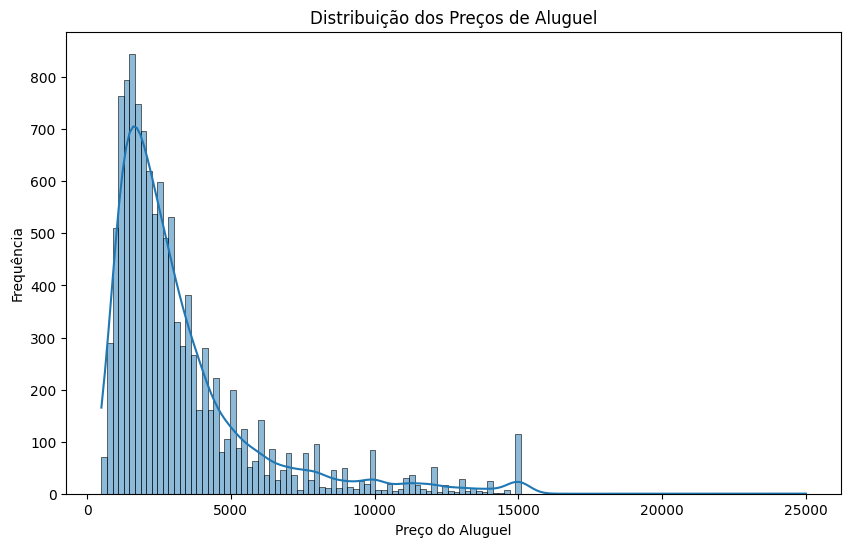

In [ ]:
# Histograma da distribuição dos preços
plt.figure(figsize=(10, 6))
sns.histplot(df['rent'], kde=True)
plt.title('Distribuição dos Preços de Aluguel')
plt.xlabel('Preço do Aluguel')
plt.ylabel('Frequência')
plt.show()

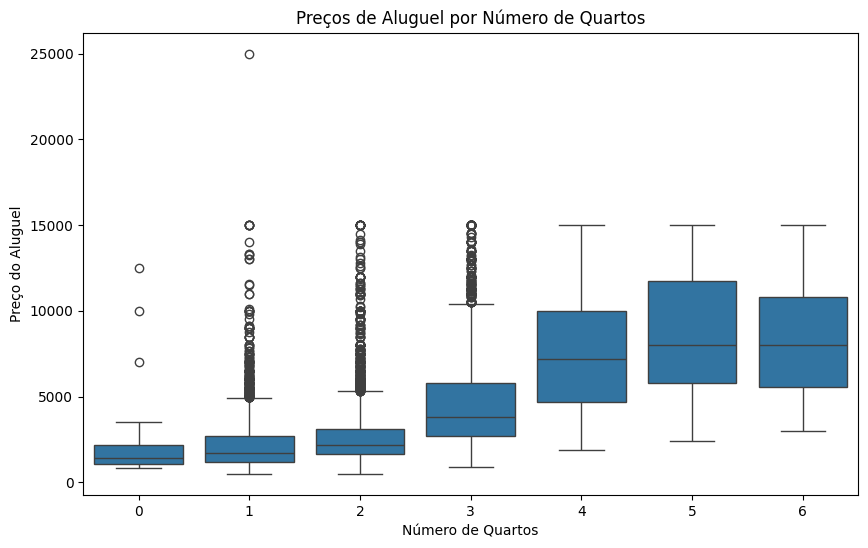

In [ ]:
# Boxplot dos preços de aluguel por número de quartos
plt.figure(figsize=(10, 6))
sns.boxplot(x='bedrooms', y='rent', data=df)
plt.title('Preços de Aluguel por Número de Quartos')
plt.xlabel('Número de Quartos')
plt.ylabel('Preço do Aluguel')
plt.show()

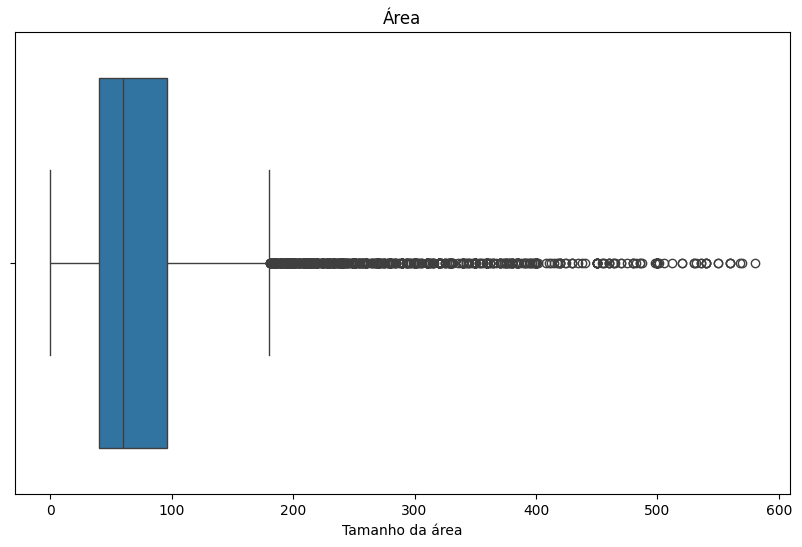

In [ ]:
 # Boxplot das área
plt.figure(figsize=(10, 6))
sns.boxplot(x='area', data=df)
plt.title('Área')
plt.xlabel('Tamanho da área')
plt.show()

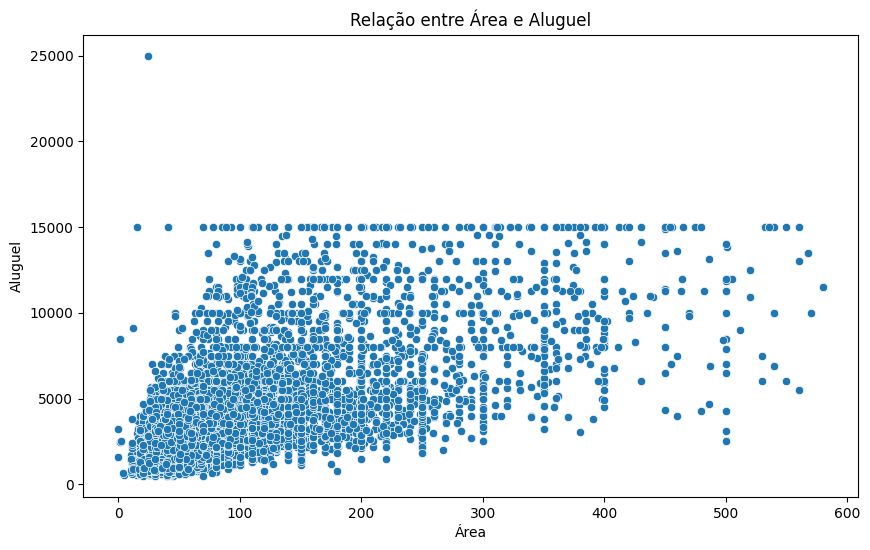

In [ ]:
# Gráfico de dispersão para comparar preço e área
plt.figure(figsize=(10, 6))
sns.scatterplot(x='area', y='rent', data=df)
plt.title('Relação entre Área e Aluguel')
plt.xlabel('Área')
plt.ylabel('Aluguel')
plt.show()

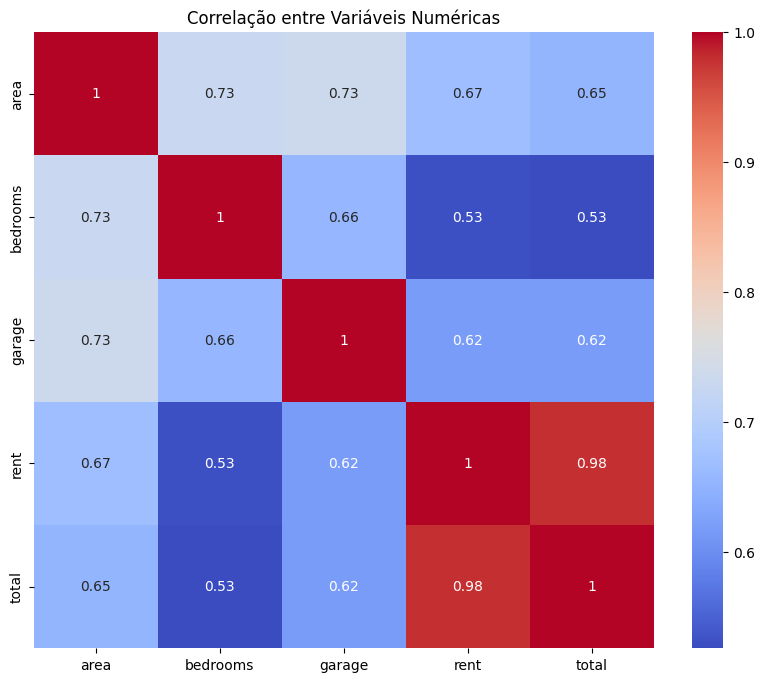

In [ ]:
# Mapa de calor da correlação entre as variáveis numéricas
plt.figure(figsize=(10, 8))
sns.heatmap(df.select_dtypes(include=['number']).corr(), annot=True, cmap='coolwarm')
plt.title('Correlação entre Variáveis Numéricas')
plt.show()

## 3. Limpeza dos Dados

In [ ]:
# verificando área menor que 10m2
df[df['area']<10]

,address,district,area,bedrooms,garage,type,rent,total
962,Rua Engenheiro Bianor,Butantã,1,1,1,Studio e kitnet,2490,2987
1223,Rua Mussumés,Vila Maria Alta,5,1,0,Casa,570,594
2983,Rua Relíquia,Jardim das Laranjeiras,0,2,1,Apartamento,1600,2569
5323,Rua Solidônio Leite,Vila Ivone,2,2,2,Casa,2500,2711
7085,Rua Edmundo de Amicis,Morumbi,0,3,2,Casa,3200,3351
9898,Rua Visconde de Porto Seguro,Jardim dos Estados,1,4,3,Casa em condomínio,8500,11420
11055,Travessa Santa Filomena,Vila Campo Grande,4,1,0,Casa,630,641


In [ ]:
# verificando quantidade área menor que 10m2
print(f'''
Registros total {df.shape[0]}
Registros filtro {df[df['area']<10].shape[0]}
Representa {round(df[df['area']<10].shape[0]/df.shape[0],3)}%
''')


Registros total 11657
Registros filtro 7
Representa 0.001%



In [ ]:
# removendo os registros com área zerada
df = df[df['area'] > 9].copy()

In [ ]:
# verificando registro com garagem e quartos zerados
df[(df['garage'] < 1) & (df['bedrooms'] < 1)]

,address,district,area,bedrooms,garage,type,rent,total
71,Rua Natividade Saldanha,São Lucas,22,0,0,Studio e kitnet,900,1126
98,Rua Natividade Saldanha,São Lucas,19,0,0,Studio e kitnet,850,1052
163,Rua João José Pacheco,Jardim Vila Mariana,22,0,0,Studio e kitnet,2200,2808
259,Rua Riskallah Jorge,Centro Histórico de São Paulo,28,0,0,Studio e kitnet,1207,1647
476,Rua Doutor Miguel Vieira Ferreira,Tatuapé,30,0,0,Apartamento,1840,2113
493,Rua Natividade Saldanha,São Lucas,32,0,0,Studio e kitnet,1200,1532
569,Rua Albino Boldasso Gabril,Vila Cruzeiro,44,0,0,Studio e kitnet,1400,1598
604,Rua Natividade Saldanha,São Lucas,29,0,0,Studio e kitnet,1150,1452
631,Avenida São João,Santa Cecilia,35,0,0,Studio e kitnet,935,1348
708,Rua Doutor Albuquerque Lins,Santa Cecília,63,0,0,Studio e kitnet,1600,2186


In [ ]:
print(f'''
Registros total {df.shape[0]}
Registros filtro {df[(df['garage'] < 1) & (df['bedrooms'] < 1)].shape[0]}
Representa {round(df[(df['garage'] < 1) & (df['bedrooms'] < 1)].shape[0]/df.shape[0],3)}%
''')


Registros total 11650
Registros filtro 33
Representa 0.003%



In [ ]:
# removendo os registros com garagem e quartos zerados
df = df[(df['garage'] > 0) | (df['bedrooms'] > 0)]

## 4. Seleção de Variáveis

## 4.1. Enriquecendo as Variáveis

In [ ]:
df.head()

,address,district,area,bedrooms,garage,type,rent,total
0,Rua Herval,Belenzinho,21,1,0,Studio e kitnet,2400,2939
1,Avenida São Miguel,Vila Marieta,15,1,1,Studio e kitnet,1030,1345
2,Rua Oscar Freire,Pinheiros,18,1,0,Apartamento,4000,4661
3,Rua Júlio Sayago,Vila Ré,56,2,2,Casa em condomínio,1750,1954
4,Rua Barata Ribeiro,Bela Vista,19,1,0,Studio e kitnet,4000,4654


In [ ]:
# criando uma váriavel do total de ambientes
df['rooms'] = df['bedrooms'] + df['garage']
df.head(3)

,address,district,area,bedrooms,garage,type,rent,total,rooms
0,Rua Herval,Belenzinho,21,1,0,Studio e kitnet,2400,2939,1
1,Avenida São Miguel,Vila Marieta,15,1,1,Studio e kitnet,1030,1345,2
2,Rua Oscar Freire,Pinheiros,18,1,0,Apartamento,4000,4661,1


In [ ]:
# criando uma váriavel do tamanho médio dos ambientes ambientes
df['m_rooms'] = df['area'] / df['rooms']
df.head(3)

,address,district,area,bedrooms,garage,type,rent,total,rooms,m_rooms
0,Rua Herval,Belenzinho,21,1,0,Studio e kitnet,2400,2939,1,21.0
1,Avenida São Miguel,Vila Marieta,15,1,1,Studio e kitnet,1030,1345,2,7.5
2,Rua Oscar Freire,Pinheiros,18,1,0,Apartamento,4000,4661,1,18.0


In [ ]:
# criando uma váriavel com as taxas do imóvel
df['tax'] = df['total'] - df['rent']
df.head(3)

,address,district,area,bedrooms,garage,type,rent,total,rooms,m_rooms,tax
0,Rua Herval,Belenzinho,21,1,0,Studio e kitnet,2400,2939,1,21.0,539
1,Avenida São Miguel,Vila Marieta,15,1,1,Studio e kitnet,1030,1345,2,7.5,315
2,Rua Oscar Freire,Pinheiros,18,1,0,Apartamento,4000,4661,1,18.0,661


In [ ]:
# métricas estatisticas básicas das variáveis numéricas
df.describe()

,area,bedrooms,garage,rent,total,rooms,m_rooms,tax
count,11617.000000,11617.000000,11617.000000,11617.000000,11617.000000,11617.000000,11617.000000,11617.000000
mean,84.845657,1.971852,1.063269,3255.576052,4086.204184,3.035121,28.689726,830.628131
std,74.063801,0.926621,1.132588,2652.492390,3354.817579,1.875784,13.510507,939.845458
min,10.000000,0.000000,0.000000,500.000000,509.000000,1.000000,3.666667,9.000000
25%,40.000000,1.000000,0.000000,1599.000000,2000.000000,2.000000,19.333333,269.000000
50%,60.000000,2.000000,1.000000,2426.000000,3063.000000,3.000000,25.000000,578.000000
75%,96.000000,3.000000,2.000000,3800.000000,4782.000000,4.000000,35.000000,1019.000000
max,580.000000,6.000000,6.000000,25000.000000,28700.000000,12.000000,254.000000,13700.000000


In [ ]:
# Codificação de Variáveis Categóricas
df['type'].unique()

array(['Studio e kitnet', 'Apartamento', 'Casa em condomínio', 'Casa'],
      dtype=object)

In [ ]:
# Codificação de Variáveis Categóricas
df['type'].head(3)

,type
0,Studio e kitnet
1,Studio e kitnet
2,Apartamento


In [ ]:
# Codificação de Variáveis Categóricas
pd.get_dummies(df['type']).head(3)

,Apartamento,Casa,Casa em condomínio,Studio e kitnet
0,False,False,False,True
1,False,False,False,True
2,True,False,False,False


## 5. Criação de Modelos

In [ ]:
# Separando as variáveis preditoras (X) e a variável alvo (y)
features = ['area', 'bedrooms', 'garage']
target = 'rent'

X = df[features]
y = df[target]

# Convertendo variáveis categóricas para numéricas (se necessário)
X = pd.get_dummies(X)

# Dividindo os dados em conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Criando o modelo de regressão linear
model = LinearRegression()

# Treinando o modelo com os dados de treino
model.fit(X_train, y_train)

LinearRegression()

## 6. Avaliação de Modelos

In [ ]:
# Fazendo previsões com os dados de teste
y_pred = model.predict(X_test)

# Calculando as métricas de avaliação
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Imprimindo as métricas
print('Mean Squared Error (MSE):', mse)
print('Root Mean Squared Error (RMSE):', rmse)
print('Mean Absolute Error (MAE):', mae)
print('R-squared (R2):', r2)

Mean Squared Error (MSE): 3494464.9638820654
Root Mean Squared Error (RMSE): 1869.3488074412612
Mean Absolute Error (MAE): 1239.888245391765
R-squared (R2): 0.4923050630381536


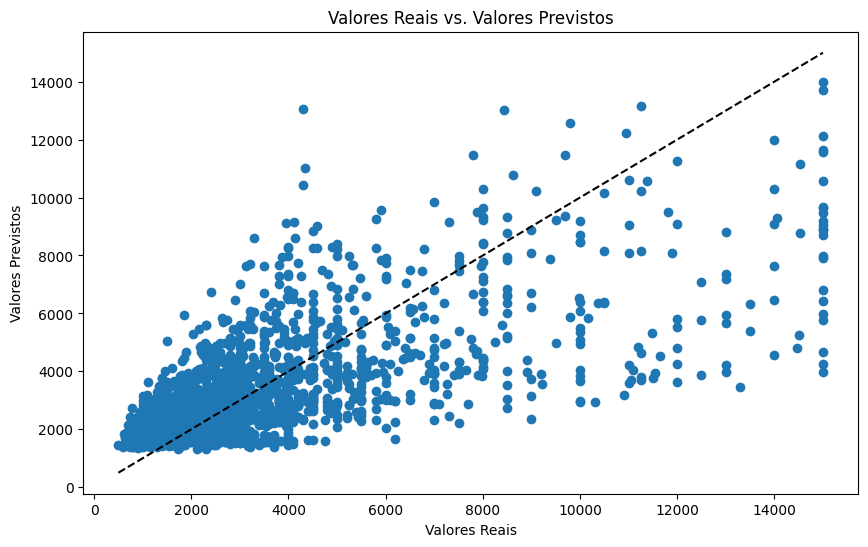

In [ ]:
# Plotando o gráfico com o resultado da avaliação do modelo e a regra de regressão
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '--k')
plt.xlabel('Valores Reais')
plt.ylabel('Valores Previstos')
plt.title('Valores Reais vs. Valores Previstos')
plt.show()

## 7. Otimizando o Modelo com Features

Mean Squared Error (MSE): 2526725.993193979
Root Mean Squared Error (RMSE): 1589.5678636642033
Mean Absolute Error (MAE): 1020.4816705280131
R-squared (R2): 0.6329034610181402


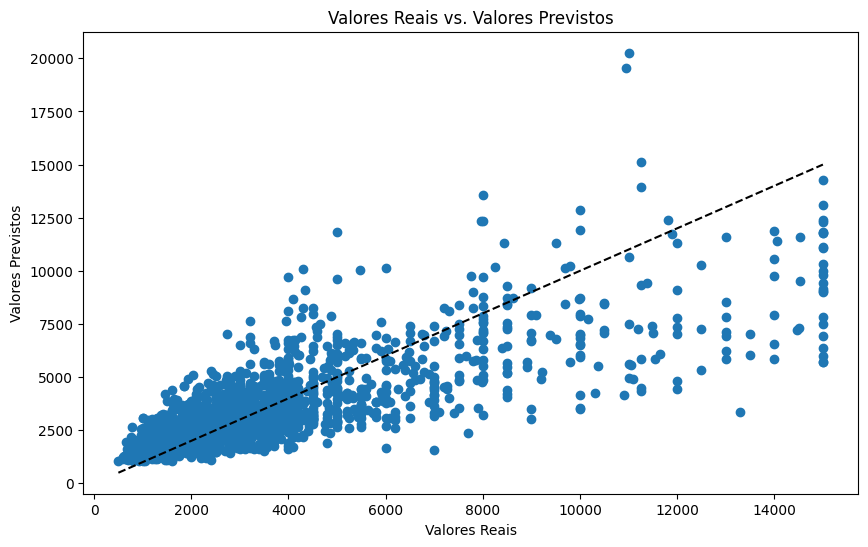

In [ ]:
# Separando as variáveis preditoras (X) e a variável alvo (y)
features = ['area', 'bedrooms', 'garage', 'type', 'rooms', 'm_rooms', 'tax']
target = 'rent'

X = df[features]
y = df[target]

# Convertendo variáveis categóricas para numéricas (se necessário)
X = pd.get_dummies(X)

# Dividindo os dados em conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Criando o modelo de regressão linear
model = LinearRegression()

# Treinando o modelo com os dados de treino
model.fit(X_train, y_train)

# Fazendo previsões com os dados de teste
y_pred = model.predict(X_test)

# Calculando as métricas de avaliação
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Imprimindo as métricas
print('Mean Squared Error (MSE):', mse)
print('Root Mean Squared Error (RMSE):', rmse)
print('Mean Absolute Error (MAE):', mae)
print('R-squared (R2):', r2)

# Plotando o gráfico com o resultado da avaliação do modelo e a regra de regressão
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '--k')
plt.xlabel('Valores Reais')
plt.ylabel('Valores Previstos')
plt.title('Valores Reais vs. Valores Previstos')
plt.show()

## 7.1. Otimizando o Modelo

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001474 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 785
[LightGBM] [Info] Number of data points in the train set: 9293, number of used features: 10
[LightGBM] [Info] Start training from score 3266.048639
Mean Squared Error (MSE): 2126394.744681018
Root Mean Squared Error (RMSE): 1458.2162887174927
Mean Absolute Error (MAE): 930.2225989698707
R-squared (R2): 0.6910657691478103


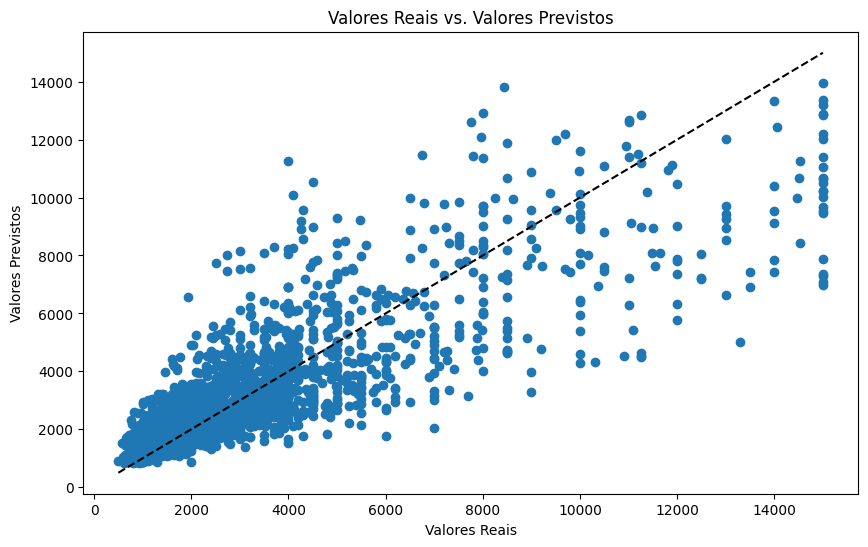

In [ ]:
# Separando as variáveis preditoras (X) e a variável alvo (y)
features = ['area', 'bedrooms', 'garage', 'type', 'rooms', 'm_rooms', 'tax']
target = 'rent'

X = df[features]
y = df[target]

# Convertendo variáveis categóricas para numéricas (se necessário)
X = pd.get_dummies(X)

# Dividindo os dados em conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Criando o modelo de regressão linear
model = lgb.LGBMRegressor()

# Treinando o modelo com os dados de treino
model.fit(X_train, y_train)

# Fazendo previsões com os dados de teste
y_pred = model.predict(X_test)

# Calculando as métricas de avaliação
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Imprimindo as métricas
print('Mean Squared Error (MSE):', mse)
print('Root Mean Squared Error (RMSE):', rmse)
print('Mean Absolute Error (MAE):', mae)
print('R-squared (R2):', r2)

# Plotando o gráfico com o resultado da avaliação do modelo e a regra de regressão
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '--k')
plt.xlabel('Valores Reais')
plt.ylabel('Valores Previstos')
plt.title('Valores Reais vs. Valores Previstos')
plt.show()

## 8. Implementação e Monitoramento

In [ ]:
# função para receber os parametros e prever o valor do aluguel
def prever_aluguel(area, quartos, garagem, tipo, taxa):

  # Criando um DataFrame com os dados de entrada
  input_data = pd.DataFrame({
      'area': [area],
      'bedrooms': [quartos],
      'garage': [garagem],
      'type': [tipo],
      'rooms': [quartos + garagem],
      'm_rooms': [area / (quartos + garagem)],
      'tax': [taxa]
  })

  # Convertendo variáveis categóricas para numéricas
  input_data = pd.get_dummies(input_data)

  # Ajustando as colunas do DataFrame de entrada para corresponder às colunas do modelo
  input_data = input_data.reindex(columns=X_train.columns, fill_value=0)

  # Fazendo a previsão
  aluguel_previsto = model.predict(input_data)[0]

  print("O valor do aluguel sugerido é: R$", round(aluguel_previsto, 2))

In [ ]:
# imput de dados do usuário
area = float(input("Digite a área do imóvel: "))
quartos = int(input("Digite o número de quartos: "))
garagem = int(input("Digite o número de vagas na garagem: "))
tipo = input("Digite o tipo do imóvel (Casa, Apartamento): ")
taxa = float(input("Digite as taxas do imóvel: "))

# Chamando a função para testar
prever_aluguel(area, quartos, garagem, tipo, taxa)

Digite a área do imóvel: 250
Digite o número de quartos: 3
Digite o número de vagas na garagem: 1
Digite o tipo do imóvel (Casa, Apartamento): Casa
Digite as taxas do imóvel: 200
O valor do aluguel sugerido é: R$ 3433.85


In [ ]:
# verificando resultado
df[(df['area'] == area)\
   & (df['garage'] == garagem)\
   & (df['bedrooms'] == quartos)\
   & (df['type'] == tipo)\
   & (df['tax'] > taxa)]

,address,district,area,bedrooms,garage,type,rent,total,rooms,m_rooms,tax
6552,Rua Primeira Cruz,Parque Independencia,250,3,1,Casa,2150,2403,4,62.5,253
10908,Rua Diogo de Oliveira Neves,Terceira Divisão de Interlagos,250,3,1,Casa,1850,2058,4,62.5,208
